<a href="https://colab.research.google.com/github/DanielRodrigalvarez/M2.855/blob/main/Mineria%20de%20dades/PAC3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="https://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/llibre-estil/logo-UOC-2linies.png", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.955 · Models avançats en mineria de dades</p>
<p style="margin: 0; text-align:right;">2023-1 · Màster universitari en Ciència de dades (Data science)</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# PAC 3: Mètodes supervisats

En aquesta pràctica veurem diferents mètodes supervisats i intentarem optimitzar diferents mètriques. Veurem com els diferents models classifiquen els punts i amb els quals obtenim més precisió. Després aplicarem tot allò que hem après fins ara a un dataset nou simulant un cas pràctic real.

1. [Exploració d'algorismes supervisats](#eje1) \
     1.0. Càrrega de dades \
     1.1. Naive-Bayes\
     1.2. Anàlisi Discriminant Lineal (LDA) i Anàlisi Discriminant Quadrtàtica (QDA)\
     1.3. K veïns més propers (KNN)\
     1.4. Màquines de suport vectorial (SVM)\
     1.5. Arbres de decisió
2. [Implementació del cas pràctic](#eje2)\
     2.0. Càrrega de dades\
     2.1. Anàlisi Exploratori de Dades\
     2.2. Preprocessament de Dades\
     2.3. Modelització\
     2.4. Ajustament d'hiperparàmetres\


<u>Consideracions generals</u>:

- La solució plantejada no pot utilitzar mètodes, funcions o paràmetres declarats **_deprecated_** en futures versions, a excepció de la càrrega de dades com s'indica posteriorment.
- Aquesta PAC s'ha de fer de manera **estrictament individual**. Qualsevol indici de còpia serà penalitzat amb un suspens (D) per a totes les parts implicades i la possible avaluació negativa de lassignatura de forma íntegra.
- Cal que l'estudiant indiqui **totes les fonts** que ha fet servir per a la realització de la PAC. Si no és així, es considerarà que l'estudiant ha comès plagi, i és penalitzat amb un suspens (D) i la possible avaluació negativa de l'assignatura de forma íntegra.

<u>Format del lliurament</u>:

- Alguns exercicis poden suposar diversos minuts d'execució, per la qual cosa el lliurament s'ha de fer a **format notebook** ia **format html**, on es vegi el codi, els resultats i comentaris de cada exercici. Es pot exportar el notebook a HTML des del menú File $\to$ Download as $\to$ HTML.
- Hi ha un tipus de cel·la especial per albergar text. Aquest tipus de cel·la us serà molt útil per respondre les diferents preguntes teòriques plantejades al llarg de lactivitat. Per canviar el tipus de cel·la a aquest tipus, al menú: Cell $\to$ Cell Type $\to$ Markdown.
- **Per a més visualització, se suggereix que l'anàlisi es respongui dins de les cel·les de color verd.**

<div class="alert alert-block alert-info">
    <strong>Nombre y apellidos:</strong>
</div>

In [19]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline


<a id='ex1'></a>
# 1. Exploració d'Algorismes Supervisats (5 punts)

## 1.0 Càrrega de dades

Treballarem amb el conjunt de dades "Spiral", un conjunt sintètic àmpliament utilitzat en l'aprenentatge automàtic i la mineria de dades per a problemes de classificació no lineals. Aquest conjunt es compon de dues espirals entrellaçades, similars a les espirals d'Arquimedes, on cada punt està uniformement distribuït al pla i etiquetat amb una de dues classes.

La teva tasca en aquesta secció és aplicar un algorisme de classificació per predir la classe d'un punt desconegut basant-te en les coordenades (x, y). Aquest desafiament és interessant a causa de la naturalesa no lineal de les espirals entrellaçades, cosa que posa a prova els algorismes daprenentatge automàtic.

Seguiu aquests passos:

1. Utilitza el codi proveït per carregar 2000 punts a la variable `X` i les corresponents etiquetes o grups (en forma numèrica) a la variable `y`.
2. Confirma que la càrrega de dades ha estat exitosa. Per fer-ho, verifica les dimensions de `X` i `y`.
3. Visualitza el gràfic dels punts, utilitzant colors diferents per a cada grup, per tenir una representació visual clara del conjunt de dades.

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dimensiones de X (2000, 2)
Dimensiones de y (2000,)


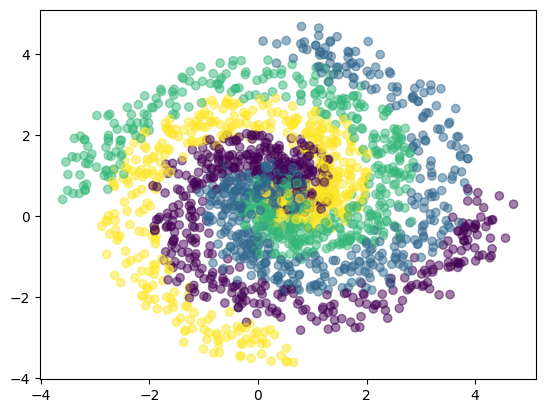

In [12]:
data = pd.read_pickle('/content/drive/MyDrive/UOC - Assignatures/Mineria de dades, models avançats/PAC3/spiral.pickle')

# Convertir les dues primeres columnes en un array de numpy
X = data[['X1', 'X2']].values

# Convertir la darrera columna en un array de numpy
y = data['y'].values

print('Dimensiones de X', X.shape)
print('Dimensiones de y', y.shape)

# Fer la representació gràfica
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.viridis, alpha=0.5)
plt.show()

Al llarg dels exercicis, aprendràs a visualitzar gràficament les fronteres de decisió generades per diferents models. Per aconseguir això, utilitzarem la funció definida a continuació, que segueix els passos següents:

1. Crea una [malla](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html) (meshgrid) usant els valors mínims i màxims de 'x' i 'y'.
2. Realitzeu prediccions del classificador utilitzant els valors d'aquesta malla.
3. Redimensiona (_reshape_) les dades perquè tinguin el format adequat.

Un cop completats aquests passos, estarem llestos per generar el gràfic de les fronteres de decisió i superposar els punts reals. Així, podrem observar les àrees que el model identifica com a pertanyents a una classe específica i aquelles que en considera una altra. En superposar els punts reals, avaluaré com el model classifica correctament els punts a les àrees corresponents.

En general, veure les fronteres de decisió ens proporcionarà una comprensió visual del rendiment del model.

In [14]:
def plot_decision_boundary(clf, X, Y, cmap='Paired'):
    if not isinstance(X, np.ndarray):  # Si X no es un array de numpy, lo convierte
        X = X.to_numpy()

    h = 0.02
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,7))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k', label=Y);

<div class="alert alert-block alert-info">
    <strong>Implementació:</strong>

Dividiu el _dataset_ en dos subconjunts: __*train*__ i __*test*__. Assigna el 80% de les dades al conjunt d'entrenament (__*train*__) i el 20% al conjunt de prova (__*test*__). Anomena els conjunts com `X_train`, `X_test`, `y_train` i `y_test`, assegurant-te d'utilitzar l'opció `random_state = 24` per garantir la reproductibilitat dels resultats.

Per realitzar aquesta divisió, empreu la funció `train_test_split` de la biblioteca `sklearn`.

Recordeu que és essencial dividir el conjunt de dades en conjunts d'entrenament i prova. Aquesta divisió és crucial per avaluar el rendiment del teu model de manera efectiva i fiable. Així podràs entendre com es comportarà el model amb dades noves i no vistes durant el seu entrenament.
    </div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

## 1.1. Gaussian Naïve Bayes

El propòsit d'aquest primer exercici és comprendre el funcionament de l'algorisme Naïve-Bayes, un peculiar algorisme que es basa en el teorema de Bayes per calcular la probabilitat que una observació pertanyi a cadascuna de les classes. Aquest model assumeix que les característiques d'entrada són independents entre si, cosa que permet simplificar el càlcul de les probabilitats condicionals.

<div class="alert alert-block alert-info">
<strong>Implementació:</strong>

1. **Entrena un Model de Naïve-Bayes:** Utilitza el conjunt de dades de _train_ per entrenar un model de Naïve-Bayes. Empra el classificador `GaussianNB` de la biblioteca `sklearn` per a aquest fi.

2. **Calcula l'_Accuracy_ del Model:** Un cop entrenat el model, calcula la seva precisió (_accuracy_) tant en el conjunt de _train_ com en el de _test_. Això et permetrà avaluar què tan bé funciona el teu model.

3. **Calcula la Matriu de Confusió:** Utilitza el conjunt de _test_ per calcular la matriu de confusió del model. Aquesta matriu us ajudarà a entendre de millor manera els encerts i errors del vostre classificador.

4. **Representa Gràficament la Frontera de Decisió:** Finalment, visualitza la frontera de decisió del model utilitzant el conjunt de _test_. Podeu fer-ho amb l'ajuda de la funció `plot_decision_boundary` que ja heu creat prèviament.

Per fer aquests càlculs i visualitzacions, utilitza les funcions `accuracy_score` i `confusion_matrix` del paquet `metrics` de `sklearn`.

</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

<div class="alert alert-block alert-info">
<strong>Anàlisi:</strong>

1. **Analitza les Fronteres de Decisió:** Observa i descriu com són les fronteres de decisió obtingudes. Reflexiona i respon: Té sentit que les fronteres tinguin aquesta forma considerant l'algorisme de Naïve-Bayes que has fet servir? Fonamenta la teva resposta sobre la base de les característiques i suposicions de l'algorisme.

2. **Avalua les Prediccions al Conjunt de Test:** Examina com són les prediccions que el model ha realitzat sobre el conjunt de test. Discuteix l'efectivitat del model i qualsevol patró o tendència que observis a les prediccions. Considera aspectes com la precisió, la matriu de confusió i qualsevol altre factor rellevant que hagis notat durant la implementació.
</div>

<div class="alert alert-block alert-success">
<strong>Respuesta:</strong>


</div>

### 1.2 Anàlisi Discriminant Lineal (LDA) i Anàlisi Discriminant Quadràtic (QDA)

Ara analitzaràs dos algorismes que es basen en la transformació lineal de les característiques d'entrada per tal de maximitzar la separació entre les classes. Aquests models operen sota la suposició que les característiques segueixen una distribució gaussiana. Això us permetrà calcular les probabilitats condicionals de cada classe. Amb aquests càlculs, assignaràs a cada observació la classe que presenti la probabilitat condicional més gran.


<div class="alert alert-block alert-info">
<strong>Implementació:</strong>

Seguiu aquests passos amb el dataset d'entrenament (_train_):
    
1. Entrena un model d'Anàlisi Discriminant Lineal (LDA) utilitzant el classificador `LinearDiscriminantAnalysis` de `sklearn`.
2. Calcula el _accuracy_ (precisió) del model tant en les dades de _train_ com de _test_.
3. Calcula la matriu de confusió utilitzant les dades de _test_.
4. Representa gràficament la frontera de decisió amb les dades de _test_.

Aquestes accions us ajudaran a avaluar l'eficàcia del model LDA en el vostre conjunt de dades ia entendre millor com classifica les observacions.

</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

<div class="alert alert-block alert-info">
<strong>Anàlisi:</strong>

1. Observa les fronteres de decisió que has generat. Reflexiona sobre la forma: S'ajusten al que esperaries de l'algoritme d'Anàlisi Discriminant Lineal (LDA)? Considera la naturalesa lineal de l'algorisme i com això influeix a la forma de les fronteres.
2. Avalua les prediccions realitzades sobre el conjunt de tests. Analitza'n la precisió i com es distribueixen respecte a les fronteres de decisió. Són coherents aquestes prediccions amb el que observes a les fronteres de decisió?

Aquestes reflexions us permetran comprendre millor l'efectivitat del model LDA i la seva adequació per al conjunt de dades amb què esteu treballant."
</div>

<div class="alert alert-block alert-success">
<strong>Resposta:</strong>


</div>

<div class="alert alert-block alert-info">
<strong>Implementació:</strong>

Realitza els passos següents:

1. Amb el dataset d'entrenament (_train_), entrena un model d'Anàlisi Discriminant Quadràtica (QDA) usant el classificador `QuadraticDiscriminantAnalysis` de `sklearn`.
2. Calcula el _accuracy_ (precisió) del model tant en les dades de _train_ com de _test_.
3. Calcula la matriu de confusió utilitzant les dades de _test_.
4. Representa gràficament la frontera de decisió amb les dades de _test_.

Aquests passos us ajudaran a avaluar com el model QDA es comporta amb el vostre conjunt de dades, ia entendre la seva capacitat per classificar i diferenciar entre les classes."

</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

<div class="alert alert-block alert-info">
<strong>Anàlisi:</strong>

1. Examina les fronteres de decisió que has generat. Reflexiona sobre la seva forma: És coherent amb allò que esperaries de l'algorisme d'Anàlisi Discriminant Quadràtica (QDA)? Considera que la naturalesa quadràtica de l'algorisme podria influir en la forma d'aquestes fronteres.
2. Avalua les prediccions realitzades sobre el conjunt de tests. Observa la precisió i com es distribueixen en relació amb les fronteres de decisió. Són aquestes prediccions consistents amb les fronteres observades?
3. Reflexiona sobre les diferències entre els algorismes LDA i QDA. En què es distingeixen en termes de supòsits, enfocament i resultats a les teves dades?

Aquesta anàlisi us permetrà comprendre les característiques i l'eficàcia dels dos models, LDA i QDA, i com s'apliquen al vostre conjunt de dades."
</div>

<div class="alert alert-block alert-success">
<strong>Resposta:</strong>


</div>

### 1.3. KNN

En aquest punt, entendreu el funcionament de l'algorisme KNN (K-Nearest-Neighbor), que es basa en la proximitat dels punts de dades en un espai de característiques. Analitzaràs els seus avantatges i desavantatges, i comprendràs com els paràmetres que el componen influeixen en el comportament.

KNN és un algorisme de tipus supervisat basat en instància. Això significa:

- Supervisat: El vostre conjunt de dades d'entrenament està etiquetat amb la classe o resultat esperat.
- Basat en instància (_Lazy Learning_): L'algorisme no aprèn explícitament un model, com en la regressió logística o els arbres de decisió. En canvi, memoritza les instàncies d'entrenament i les utilitza com a "coneixement" a la fase de predicció.

Per entendre com funciona el KNN, seguiu aquests passos:

1. Calculeu la distància entre l'ítem a classificar i els altres ítems del dataset d'entrenament.
2. Selecciona els "k" elements més propers, és a dir, aquells amb la menor distància, segons el tipus de distància que utilitzis (euclidiana, cosinus, manhattan, etc).
3. Realitza una "votació de majoria" entre els k punts seleccionats: la classe que predomini en aquests punts decidirà la classificació final de l'ítem analitzat.

<div class="alert alert-block alert-info">
<strong>Implementació:</strong>

Realitza els passos següents amb el dataset d'entrenament (_train_):

1. Entrena un classificador KNN amb l'hiperparàmetre `n_neighbors=2` usant el classificador `KNeighborsClassifier` de `sklearn`.
2. Calcula el _accuracy_ (precisió) del model tant en les dades de _train_ com de _test_.
3. Calcula la matriu de confusió utilitzant les dades de _test_.
4. Representa gràficament la frontera de decisió amb les dades de _test_.

Si en entrenar el classificador apareix un avís (warning) i desitges ignorar-lo, executa el codi següent abans de l'entrenament:

`import warnings`
`warnings.filterwarnings('ignore', message='^.*will change.*$', category=FutureWarning)`"

Això us permetrà avaluar l'efectivitat del model KNN amb `n_neighbors=2` en el vostre conjunt de dades, i entendre com es comporta en termes de classificació i separació de classes.
    
    
    
</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

Al model que has entrenat, has fixat el paràmetre `n_neighbors` de forma arbitrària. Tot i això, és possible que amb un altre valor obtinguis una millor predicció. Per trobar el valor òptim dels paràmetres d'un model (_hyperparameter tunning_), sovint s'utilitza una cerca de reixeta (_grid search_). Això implica entrenar un model per a cada combinació possible d'hiperparàmetres i avaluar-lo mitjançant la validació creuada (_cross validation_) amb 5 particions estratificades. Després seleccionaràs la combinació d'hiperparàmetres que hagi obtingut els millors resultats.

En aquest cas, et centraràs a optimitzar un sol hiperparàmetre:

- 𝑘: el nombre de veïns que es consideren per classificar un nou exemple. Heu de provar amb tots els valors entre 1 i 20.

Realitza aquest procés per identificar el nombre òptim de veïns, cosa que et permetrà millorar la precisió de les teves prediccions amb el model KNN.

<div class="alert alert-block alert-info">
    <strong>Implementación:</strong>

Para calcular el valor óptimo del hiperparámetro _k_ (`n_neighbors`), debes realizar una búsqueda de rejilla con validación cruzada. Este proceso te ayudará a encontrar el valor óptimo de _k_. Para cada valor, calcula su promedio y la desviación estándar. Luego, implementa un _heatmap_ para visualizar la precisión según los diferentes valores del hiperparámetro.

Utiliza el módulo `GridSearchCV` de `sklearn` para calcular el mejor hiperparámetro. Para la visualización del _heatmap_, emplea la librería `Seaborn`.

Estos pasos te permitirán identificar de manera efectiva y visual el valor de _k_ que maximiza la precisión de tu modelo KNN."
</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

<div class="alert alert-block alert-info">
<strong>Implementació:</strong>

Seguiu aquests passos amb el dataset d'entrenament (_train_):

1. Entrena un classificador KNN utilitzant el millor hiperparàmetre que hagis trobat.
2. Calcula el _accuracy_ (precisió) del model tant en les dades de _train_ com de _test_.
3. Calcula la matriu de confusió utilitzant les dades de _test_.
4. Representa gràficament la frontera de decisió amb les dades de _test_.

Aquest procés us permetrà veure com l'hiperparàmetre òptim que heu identificat millora l'efectivitat del vostre model KNN en la classificació de les dades.
</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

<div class="alert alert-block alert-info">
<strong>Anàlisi:</strong>

1. Comenta els resultats obtinguts en la cerca del millor hiperparàmetre. Reflexiona sobre com va variar el rendiment del model amb els diferents valors de `n_neighbors`.
2. Analitza com es visualitza gràficament el canvi del valor de `n_neighbors`. Observes alguna tendència o patró clar? És coherent aquesta diferència entre els dos gràfics en canviar el paràmetre?
3. Examina les fronteres de decisió que has generat. La forma d'aquestes fronteres té sentit tenint en compte l'algorisme KNN utilitzat? Pensa com l'elecció del nombre de veïns influeix en la forma de la frontera.
4. Avalua les prediccions realitzades sobre el conjunt de tests. Observa la precisió i com es distribueixen en relació amb les fronteres de decisió. Són aquestes prediccions consistents amb el que observes a les fronteres de decisió?

Aquesta anàlisi us ajudarà a comprendre l'eficàcia del model KNN amb diferents configuracions de `n_neighbors` i el seu impacte en la classificació de les dades."
</div>

<div class="alert alert-block alert-success">
<strong>Respuesta:</strong>


</div>

### 1.4. SVM

En aquesta secció, exploraràs les Màquines de Vectors de Suport (SVM), que es basen en el concepte del _Maximal Margin Classifier_ i l'hiperplà.

Un hiperplà en un espai p-dimensional es defineix com un subespai pla i afí de dimensions p-1. En dues dimensions, és una recta; en tres, un pla convencional. Per a dimensions més grans de tres, encara que no és intuïtiu visualitzar-lo, el concepte es manté.

Quan els casos són perfectament separables de manera lineal, sorgeixen infinits possibles hiperplans. Per seleccionar el classificador òptim, utilitza el concepte de _maximal margin hyperplane_, l'hiperplà més allunyat de totes les observacions d'entrenament. Aquest es defineix calculant la distància perpendicular mínima (marge) de les observacions a un hiperplà. L'hiperplà òptim és el que maximitza aquest marge.

En el procés d'optimització, has de tenir en compte que només les observacions al marge o que el violen (vectors suport) influeixen a l'hiperplà. Aquests vectors suport són els que defineixen el classificador.

#### Els _kernels_ a SVM

En situacions on no podeu trobar un hiperplà que separi dues classes, és a dir, quan les classes no són linealment separables, podeu utilitzar el truc del nucli (_kernel trick_). Aquest mètode permet treballar en una dimensió nova on és possible trobar un hiperplà per separar les classes. Pots veure un exemple a [aquest vídeo](https://www.youtube.com/watch?v=OdlNM96sHio).

Igual que amb el KNN, les SVM també depenen de diversos hiperparàmetres. En aquest cas, t'enfocaràs a optimitzar dos hiperparàmetres:

1. **C**: la regularització, que és el valor de penalització dels errors a la classificació. Aquest valor indica el compromís entre obtenir l'hiperplà amb el marge més gran possible i classificar-ne correctament el màxim nombre d'exemples. Has de provar els valors següents: 0.01, 0.1, 1, 10, 50, 100 i 200.
   
2. **Gama**: un coeficient que multiplica la distància entre dos punts al nucli radial. En termes simples, com més petit sigui gamma, més influència tindran dos punts propers. Has de provar els valors: 0.001, 0.01, 0.1, 1 i 10.

Per validar el rendiment de l'algorisme amb cada combinació d'hiperparàmetres, utilitzeu la validació creuada (_cross-validation_) amb 4 particions estratificades.

<div class="alert alert-block alert-info">
     <strong>Implementació:</strong>


1. Calcula el valor òptim dels hiperparàmetres _C_ i _gama_ utilitzant una cerca de reixeta amb validació creuada. Aquest procés us ajudarà a trobar els valors òptims.
2. Per a cada combinació de valors, calcula'n la mitjana i la desviació estàndard.
3. Fes un _heatmap_ per visualitzar la precisió segons els diferents valors dels hiperparàmetres.

Utilitza el mòdul `GridSearchCV` de `sklearn` per calcular els millors hiperparàmetres amb el classificador SVC (de `SVM` de `sklearn`). Per a la visualització del _heatmap_, empra la llibreria `Seaborn`.

Aquests passos us permetran identificar de manera efectiva i visual els valors de _C_ i _gama_ que maximitzen la precisió del vostre model SVM.
</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

<div class="alert alert-block alert-info">
<strong>Implementació:</strong>

Realitza els passos següents amb el dataset d'entrenament (_train_):

1. Entrena un model SVM fent servir la millor combinació de paràmetres que hagis trobat.
2. Calcula el _accuracy_ (precisió) del model tant en les dades de _train_ com de _test_.
3. Calcula la matriu de confusió utilitzant les dades de _test_.
4. Representa gràficament la frontera de decisió amb les dades de _test_.

Aquest procés us permetrà veure com la millor combinació de paràmetres millora l'efectivitat del vostre model SVM en la classificació de les dades.
</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

<div class="alert alert-block alert-info">
<strong>Anàlisi:</strong>

1. Comenta els resultats obtinguts en la cerca dels millors hiperparàmetres. Reflexiona sobre com va variar el rendiment del model SVM amb els diferents valors de _C_ i _gama_. Considereu si els valors òptims trobats tenen sentit en el context del vostre conjunt de dades.
2. Examina les fronteres de decisió que has generat amb el model SVM. La forma d'aquestes fronteres és coherent amb allò que esperaries de l'algorisme utilitzat? Pensa com la combinació d'hiperparàmetres seleccionats podria influir en la forma de les fronteres.
3. Avalua les prediccions realitzades sobre el conjunt de tests. Observa la precisió i com es distribueixen en relació amb les fronteres de decisió. Són aquestes prediccions consistents amb el que observes a les fronteres de decisió?

Aquesta anàlisi us ajudarà a comprendre l'eficàcia del model SVM amb els hiperparàmetres seleccionats i el seu impacte en la classificació de les dades."
</div>

<div class="alert alert-block alert-success">
<strong>Resposta:</strong>


</div>

### 1.5. Arbres de decisió

En aquesta secció, exploraràs els arbres de decisió, models predictius que es basen en regles binàries (si/no) per classificar les observacions segons els seus atributs i predir el valor de la variable resposta. Aquests arbres poden ser classificadors, com en el teu exemple, o tornadors per predir variables contínues.

#### Construcció d'un Arbre

Per construir un arbre, segueix l'algorisme de *recursive binary splitting*:

1. Comença a la part superior de l'arbre, on totes les observacions pertanyen a la mateixa regió.
2. Identifica tots els possibles punts de tall per a cadascun dels predictors. Aquests punts de tall són els diferents nivells dels predictors.
3. Avalua les possibles divisions per a cada predictor fent servir una mesura específica. En els classificadors, aquestes mesures poden ser el *classification error rate*, l'índex Gini, l'entropia o el txi-square.

Comprendre aquests passos t'ajudarà a entendre com els arbres de decisió creen divisions binàries per classificar les dades i com es poden aplicar tant per classificació com per regressió.

<div class="alert alert-block alert-info">
<strong>Implementació:</strong>

Seguiu aquests passos:

1. Amb el dataset d'entrenament (_train_), entrena un arbre de decisió utilitzant el classificador `DecisionTreeClassifier` de la biblioteca `tree` de `sklearn`.
2. Calcula el _accuracy_ (precisió) del model tant en les dades de _train_ com de _test_.
3. Calcula la matriu de confusió utilitzant les dades de _test_.
4. Representa gràficament la frontera de decisió amb les dades de _test_.
5. Representa l‟arbre de decisió. Podeu utilitzar la comanda `plot.tree` de la biblioteca `tree` de `sklearn`.

Aquests passos us permetran avaluar com l'arbre de decisió es comporta en el vostre conjunt de dades, tant en termes de classificació com en la seva representació visual."
</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

<div class="alert alert-block alert-info">
<strong>Anàlisi:</strong>

1. Avalua i comenta els resultats obtinguts amb l‟arbre de decisió. Considera tant el _accuracy_ del model en els conjunts de _train_ i _test_ com els resultats de la matriu de confusió.
2. Reflexiona sobre com la frontera de decisió visualitzada al conjunt de _test_ s'alinea amb els resultats obtinguts. És coherent amb allò que esperaries d'un arbre de decisió?
3. Observa la representació gràfica de l‟arbre. Analitza com les diferents ramificacions i decisions preses a l'arbre expliquen el comportament del model i el seu impacte a la classificació de les dades.

Aquesta anàlisi us ajudarà a comprendre en profunditat el funcionament i l'eficàcia de l'arbre de decisió en el vostre conjunt de dades específic."

</div>

<div class="alert alert-block alert-success">
<strong>Resposta:</strong>


</div>

#### Evitant el *overfitting*

El procés de construcció d'arbres descrit tendeix a reduir ràpidament l'error d'entrenament, per la qual cosa generalment el model s'ajusta molt bé a les observacions utilitzades com a entrenament (conjunt de train). Com a conseqüència, els arbres de decisió tendeixen al *overfitting*.
   
Per evitar l'overfitting als arbres de decisió, és crucial que modifiquis certs hiperparàmetres del model. Aquí t'explico com fer-ho:

1. Fes servir l'hiperparàmetre `max_depth`, que defineix la profunditat màxima de l'arbre. Hauràs d'explorar els valors entre 4 i 10 per trobar l'equilibri adequat entre la complexitat del model i la capacitat per generalitzar.
2. Estableix l'hiperparàmetre min_samples_split, que és el nombre mínim d'observacions que ha de tenir una fulla de l'arbre abans de considerar una divisió. Experimenta amb valors com 2, 10, 20, 50 i 100 per assegurar-te que l'arbre no es torni gaire específic per a les observacions d'entrenament.

Ajustant aquests hiperparàmetres, podràs controlar la tendència de l'arbre de decisió a sobreajustar-se al conjunt d'entrenament, millorant així la seva capacitat per fer prediccions efectives en noves dades.

<div class="alert alert-block alert-info">
     <strong>Implementació:</strong>

1. Calcula el valor òptim dels hiperparàmetres `max_depth` i `min_samples_split` utilitzant una cerca de reixeta amb validació creuada. Aquest procés us ajudarà a trobar els valors òptims que evitaran el sobreajustament.
2. Per a cada combinació de valors, calcula'n la mitjana i la desviació estàndard.
3. Fes un _heatmap_ per visualitzar la precisió segons els diferents valors dels hiperparàmetres.

Utilitza el mòdul `GridSearchCV` de `sklearn` per calcular els millors hiperparàmetres amb el classificador `DecisionTreeClassifier` de `tree` de `sklearn`. Per a la visualització del _heatmap_, empra la llibreria `Seaborn`.

Aquests passos us permetran identificar de manera efectiva i visual els valors de `max_depth` i `min_samples_split` que maximitzen la precisió del vostre arbre de decisió, minimitzant el risc de sobreajustament.
</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

<div class="alert alert-block alert-info">
<strong>Implementació:</strong>


1. Entrena un arbre de decisió amb el dataset d'entrenament (_train_) fent servir la millor combinació de paràmetres que hagis trobat.
2. Calcula el _accuracy_ (precisió) del model tant en les dades de _train_ com de _test_.
3. Calcula la matriu de confusió utilitzant les dades de _test_.
4. Representa gràficament la frontera de decisió amb les dades de _test_.
5. Representa l‟arbre de decisió.

Aquests passos us permetran avaluar com l'arbre de decisió, ajustat amb els hiperparàmetres òptims, es comporta en el vostre conjunt de dades, tant en termes de classificació com en la seva representació visual."
    
</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

<div class="alert alert-block alert-info">
<strong>Anàlisi:</strong>

1. Avalua i comenta els resultats obtinguts en la cerca dels millors hiperparàmetres. Considereu com la combinació òptima de `max_depth` i `min_samples_split` ha impactat el rendiment de l'arbre de decisió.
2. Examina les fronteres de decisió generades amb el conjunt de _test_. Reflexiona sobre si la forma daquestes fronteres és coherent amb el que esperaries dun arbre de decisió configurat amb aquests hiperparàmetres.
3. Analitza les prediccions fetes sobre el conjunt de test. Observa la precisió i com es distribueixen en relació amb les fronteres de decisió. Aquestes prediccions són consistents amb l'estructura de l'arbre de decisió i les fronteres observades?

Aquesta anàlisi us ajudarà a comprendre l'eficàcia de l'arbre de decisió amb els hiperparàmetres seleccionats i el seu impacte en la classificació de les dades."
</div>

<div class="alert alert-block alert-success">
<strong>Resposta:</strong>


</div>

<a id='ex2'></a>
# 2. Implementació del cas pràctic (5 punts)

Com a expert en anàlisi de dades, sabem la importància que les empreses de targetes de crèdit puguin identificar i prevenir transaccions fraudulentes per protegir els seus clients. En aquest sentit, estudiarem un conjunt de dades que conté informació sobre transaccions realitzades amb targetes de crèdit el setembre del 2013 per titulars de targetes europeus.

Aquest conjunt de dades presenta transaccions ocorregudes en dos dies, on s'han registrat 492 casos de frau d'un total de 284,807 transaccions. És important destacar que totes les variables dentrada són numèriques i van ser obtingudes a través duna transformació PCA. Lamentablement, per raons de confidencialitat, no es poden proporcionar les característiques originals ni més informació sobre les dades. Les variables V1 a V28 representen els components principals obtinguts amb PCA, mentre que “Time” i “Amount” són les úniques variables que no han estat transformades amb PCA. La variable "Time" indica els segons transcorreguts entre cada transacció i la primera transacció del conjunt de dades, mentre que "Amount" representa la suma de la transacció. La variable “Class” és la variable de resposta i pren el valor 1 en cas de frau i 0 en cas contrari.

Font: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

L‟objectiu d‟aquesta secció és abordar l‟anàlisi d‟aquest conjunt de dades de diverses maneres per identificar i prevenir transaccions fraudulentes. Aquí tens alguns passos que podries seguir:

1. **Anàlisi Exploratòria de Dades (EDA)**: Comença explorant el conjunt de dades per comprendre'n l'estructura i la distribució. Atès que les transaccions fraudulentes són molt menys freqüents que les transaccions normals, aquest és un exemple de conjunt de dades desbalancejat. Observa la distribució de les variables “Time” i “Amount” i com es relacionen amb la variable objectiu “Class”.

2. **Preprocessament de Dades**: Com que les variables han estat transformades usant PCA, és probable que no requereixis de molta transformació addicional. Tot i això, considera normalitzar les variables "Time" i "Amount" perquè estiguin a la mateixa escala que les components principals.

3. **Modelització**: Utilitza un perceptró multicapa com a eina de classificació. Atès que l'objectiu és identificar transaccions fraudulentes, és vital centrar-se en mètriques com ara la precisió, la sensibilitat (recall), el valor F1 i l'àrea sota la corba ROC (AUC-ROC).

4. **Ajust d'Hiperparàmetres**: Utilitza la validació creuada per avaluar d'una manera més fiable el rendiment dels teus models. A més, ajusta els hiperparàmetres per millorar la precisió dels models.

Aquest enfocament integral et permetrà no només construir un model efectiu per detectar fraus sinó també comprendre millor les característiques subjacents de les transaccions fraudulentes al conjunt de dades.

## 2.0. Carga de datos

Lo primero que debes hacer es cargar el conjunto de datos y visualizar las primeras filas para obtener una vista previa. Asegúrate de verificar lo siguiente:

1. Confirma la cantidad total de filas y columnas en el DataFrame.
2. Revisa el nombre de cada columna del DataFrame.
3. Verifica el número de valores no nulos en cada columna.
4. Identifica el tipo de datos de cada columna, que puede ser int, float, object, entre otros.
5. Comprueba la cantidad de memoria utilizada por el DataFrame.

Estos pasos te proporcionarán una comprensión inicial clara y detallada del conjunto de datos con el que estás trabajando."

In [15]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
data = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### 2.1. Anàlisi Exploratori de Dades (EDA)

L'Anàlisi Exploratòria de Dades (EDA, per les sigles en anglès) en ciència de dades és un enfocament inicial per comprendre i resumir el contingut d'un conjunt de dades. Aquest procés implica diverses tècniques i passos:

1. **Inspecció de Dades**: Es comença per revisar les dades brutes per identificar-ne l'estructura, la mida i el tipus (com numèric, categòric). Això inclou detectar valors mancants o inusuals.

2. **Resum Estadístic**: Es calculen estadístiques descriptives com la mitjana, mediana, rang, variància i desviació estàndard per obtenir una idea general de les tendències i patrons en les dades.

3. **Visualització de Dades**: S'utilitzen gràfics i diagrames (com histogrames, gràfics de caixa, diagrames de dispersió) per visualitzar distribucions, relacions entre variables i possibles anomalies. Això ajuda a comprendre millor les dades i identificar patrons o irregularitats.

4. **Anàlisi de Relacions i Correlacions**: S'exploren les relacions entre diferents variables per entendre com s'influencien entre si. Això pot implicar lús de matrius de correlació i gràfics de dispersió.

5. **Identificació de Patrons i Anomalies**: Es busquen patrons consistents o anomalies (com a valors atípics) que puguin suggerir tendències o problemes en les dades.

L'EDA és una fase crítica en qualsevol projecte de ciència de dades, ja que proporciona una comprensió profunda i una base sòlida per a posteriors anàlisis i modelatge.

<div class="alert alert-block alert-info">
<strong>Implementació:</strong>

1. Calcula les freqüències de la variable objectiu (`Class`) al teu conjunt de dades. Aquesta variable indica si una transacció és fraudulenta o no.
2. Crea un gràfic de barres per visualitzar aquestes freqüències. Això us ajudarà a entendre la proporció de transaccions fraudulentes en comparació amb les legítimes.

A continuació, analitza la distribució de les variables descriptores:

1. Representa gràficament l'histograma de les 30 variables, separant les observacions segons la classe a què pertanyen (frau o no frau).
2. Organitza tots els histogrames en un format de 10 files i 3 columnes. Això facilitarà la comparació visual de les distribucions per a cada classe a cada variable.

Aquests passos us permetran obtenir una visió més clara de l'estructura del vostre conjunt de dades i com les diferents variables poden influir en la identificació de transaccions fraudulentes."
     </div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

<div class="alert alert-block alert-info">
<strong>Anàlisi:</strong>

1. Avalua la relació de les freqüències de la variable `Class`. Reflexiona sobre com es distribueixen les transaccions entre fraudulentes i no fraudulentes. És la distribució significativament desigual? Què implica això per a l'anàlisi i la modelització de les dades?
2. Analitza la informació proporcionada pels histogrames de les variables descriptores. Observa si hi ha diferències notables a les distribucions d'aquestes variables entre les classes. Pregunta't: Hi ha variables que mostrin patrons diferents per a les transaccions fraudulentes en comparació de les legítimes?
3. Considereu si hi ha altres formes de visualització que podrien ser útils per entendre millor les dades. Per exemple, serien útils els diagrames de caixa (boxplots) per visualitzar la distribució de les variables a les dues classes? Podria un mapa de calor de la matriu de correlació entre variables ajudar-te a entendre les relacions entre elles?

Aquesta anàlisi us ajudarà a obtenir una comprensió més profunda de la naturalesa de les vostres dades ia identificar possibles característiques que podrien ser importants per detectar transaccions fraudulentes."
</div>

<div class="alert alert-block alert-success">
<strong>Resposta:</strong>


</div>

### 2.2. Preprocessament de Dades

El preprocessament de dades en ciència de dades és un pas crucial que involucra la preparació i transformació de dades brutes en un format adequat per a la seva posterior anàlisi i modelatge. Aquest procés inclou diverses tasques essencials:

1. **Neteja de Dades**: S'eliminen o corregeixen dades errònies, incomplets, inexactes o irrellevants. Això pot incloure tractar amb valors faltants, corregir errors dentrada i manejar outliers.

2. **Normalització i Escalat**: Les dades es transformen perquè estiguin en una escala comuna, sense distorsionar diferències en els rangs de valors ni perdre informació. Per exemple, escalat min-max o estandardització.

3. **Codificació de Variables Categòriques**: Les variables categòriques (com a gènere o país) es converteixen en formats numèrics perquè puguin ser processades per algorismes d'aprenentatge automàtic, utilitzant tècniques com a codificació one-hot o codificació d'etiquetes.

4. **Divisió de Dades**: Les dades es divideixen en conjunts d'entrenament, validació i prova, permetent entrenar models, afinar hiperparàmetres i avaluar el rendiment del model de manera efectiva.

5. **Manejament de Dades Desbalancejades**: En casos de conjunts de dades desbalancejades, s'apliquen tècniques com a sobremostreig o submostreig per assegurar que el model no estigui esbiaixat cap a la classe més freqüent.

6. **Enginyeria de Característiques**: Es creen noves variables (característiques) a partir de les dades existents per millorar la capacitat del model per aprendre patrons i fer prediccions.

El preprocessament és essencial per millorar la qualitat de les dades i fer-les més adequades i efectives per anàlisi i modelatge en projectes de ciència de dades.

<div class="alert alert-block alert-info">
<strong>Implementació:</strong>

1. Atès que les columnes `Time` i `Amount` presenten problemes per al seu ús directe a l'anàlisi, primer elimina la columna `Time` del conjunt de dades. No és clar què significa aquesta columna, per la qual cosa la seva eliminació simplificarà la teva anàlisi.
2. A continuació, transforma la columna Amount per reduir-ne el rang. Abans de prendre el logaritme d'Amount, suma 0.001 (un cèntim de dòlar) a cada valor en aquesta columna per evitar la indeterminació quan el valor és 0.
3. Després de fer aquesta suma, calcula el logaritme d'Amount transformat.
4. Finalment, reemplaça la columna original `Amount` al teu DataFrame per aquesta nova columna de `Log Amount`.

Aquests ajustaments us ajudaran a normalitzar l'escala de les dades ia millorar l'eficàcia dels vostres models d'anàlisi.

</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

<div class="alert alert-block alert-info">
<strong>Implementació:</strong>

Aquí tens el text reescrit en segona persona del singular i en imperatiu:

Per a la implementació, segueix aquests passos:

1. Primer, separa els descriptors de la variable resposta. Assigna els descriptors al conjunt `X` i la variable resposta al conjunt `y`.
2. Dividiu el _dataset_ en dos subconjunts: un per a entrenament (_train_) i un altre per a proves (_test_). Assigna el 80% de les dades al conjunt d'entrenament (`X_train`, `y_train`) i el 20% al conjunt de proves (`X_test`, `y_test`). Utilitza la funció `train_test_split` de la biblioteca `model_selection` de `sklearn`. Assegureu-vos d'utilitzar `random_state = 24` i feu una divisió estratificada per mantenir la mateixa proporció de classes en tots dos conjunts.
3. És important que les matrius de les classes `y_train` i `y_test` estiguin codificades. Per a això, utilitza la funció `to_categorical` de la llibreria `TensorFlow` de `Keras`. Això convertirà les etiquetes de classe en matrius d'etiquetes de classe codificades a one-hot.

Recordeu, la codificació one-hot converteix les etiquetes categòriques en vectors binaris. En aquests vectors, el valor d'1 s'assigna a la posició corresponent a la classe i el valor de 0 a totes les altres posicions. Això facilita que els models daprenentatge automàtic processin i entenguin les etiquetes categòriques.
</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

<div class="alert alert-block alert-info">
<strong>Implementació:</strong>

1. Normalitza els descriptors utilitzant el `StandardScaler` de `sklearn`. Això estandarditzarà les característiques restant la mitjana i dividint per la desviació estàndard.
2. Mostra les dimensions del conjunt de descriptors originals, del conjunt d'entrenament i del conjunt de prova. Això us permetrà veure com s'han dividit les dades.

<strong>Nota:</strong> Ajusta l'StandardScaler únicament amb els descriptors d'entrenament per evitar la fuita d'informació o 'data leakage'. La fuita d'informació passa quan s'utilitza informació del conjunt de prova o validació en el procés d'ajustament del model. És a dir, si ajustes el model d'escalat amb tot el conjunt de dades, estaries utilitzant informació del conjunt de prova o validació a l'ajust, cosa que podria fer la impressió que el model és més precís del que realment és. Per tant, assegureu-vos d'ajustar l'StandardScaler només amb les dades d'entrenament i després aplicar-lo als conjunts d'entrenament i prova."
</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

## 2.3. Modelització

El MLP (Perceptró Multicapa) és, sens dubte, una eina poderosa en el camp de l'aprenentatge automàtic i la intel·ligència artificial. Podeu manejar tasques de classificació i regressió, cosa que ho fa versàtil per a una varietat de problemes. La seva capacitat per modelar relacions no lineals complexes el converteix en una elecció popular quan les dades no segueixen patrons lineals simples.

Aquí hi ha alguns punts clau sobre el MLP:

- **Capes i Neurones**: L'MLP consta de múltiples capes de neurones, que inclouen una capa d'entrada, una o més capes ocultes i una capa de sortida. Cada neurona en una capa està connectada a totes les neurones a la capa següent.

- **Funcions d'Activació**: Per introduir no linealitat al model, s'utilitzen funcions d'activació a les neurones, com la funció sigmoide, ReLU (Rectified Linear Unit) o tangent hiperbòlica. Aquestes funcions permeten al MLP capturar patrons complexos a les dades.

- **Aprenentatge Supervisat**: L'entrenament del MLP implica ajustar els pesos de les connexions entre neurones per minimitzar la diferència entre les sortides produïdes per la xarxa i les sortides desitjades. Això es fa utilitzant algoritmes daprenentatge supervisat, com el descens del gradient.

- **Ajust d'hiperparàmetres**: Igual que altres models d'aprenentatge automàtic, el MLP té hiperparàmetres importants, com ara el nombre de capes ocultes, el nombre de neurones a cada capa, la funció d'activació i la taxa d'aprenentatge. Sovint cal ajustar aquests hiperparàmetres per obtenir un bon rendiment en una tasca específica.

- **Generalització**: Un dels desafiaments a l'entrenament de MLP és evitar el sobreajustament (overfitting), on el model s'adapta massa a les dades d'entrenament i no generalitza bé a dades noves. La regularització i la validació creuada són tècniques comunes per abordar aquest problema.

En aquest context de detecció de frau en transaccions de targetes de crèdit, el MLP pot ser una excel·lent opció per modelar patrons complexos que indiquin transaccions fraudulentes. Tot i això, és important ajustar i avaluar acuradament el model per garantir que funcioni de manera efectiva en aquesta tasca crítica de seguretat.

Crear i entrenar un MLP amb 4 capes ocultes, cadascuna amb 20 neurones i funció d'activació ReLU és una elecció excel·lent. La funció d'activació ReLU (Rectified Linear Unit) és utilitzada comunament en capes ocultes de xarxes neuronals a causa de la seva capacitat per introduir no linealitat en el model, cosa que li permet aprendre patrons complexos en les dades.

D'altra banda, l'enfocament d'apilar capes seqüencialment utilitzant la classe Sequential de Keras és una manera eficaç i senzilla de construir models de xarxes neuronals. Després, durant l'entrenament, es poden realitzar ajustaments als hiperparàmetres i l'arquitectura del model per optimitzar-ne el rendiment en la tasca específica.

<div class="alert alert-block alert-info">
<strong>Implementació:</strong>

1. Comença creant el model `Sequential`.
2. Afegeix 4 capes ocultes, cadascuna amb 20 neurones, utilitzant el mètode `.add()`. Assegureu-vos que cada capa tingui una funció d'activació `relu`.
3. Després, afegeix la capa de sortida amb 2 neurones (una per a la classe 0 i una altra per a la classe 1) i utilitza la funció d'activació `sigmoid`.
4. No oblidis mostrar un resum del model que has creat utilitzant el mètode `.summary()`.
5. Ara, és hora de compilar el model. Utilitza el mètode `.compile()` i especifica l'optimitzador com `adam`, la funció de pèrdua com `binary_crossentropy`, i la mètrica d'avaluació com `accuracy`.
6. Després, entrena el model utilitzant el mètode `.fit()`. Assegureu-vos d'entrenar amb les dades de `X_train`, estableix el nombre d'èpoques en 100 i la mida del lot el 2048. A més, valida el rendiment utilitzant la tècnica de validació creuada amb el 80% de les dades d'entrenament. Configura el paràmetre `validation_split` a 0.2 per aconseguir-ho.
7. Per a l'informe final, crea gràfics que mostrin la pèrdua (`loss`) tant a l'entrenament com a la validació al llarg de les èpoques.
8. També genera gràfics que representin l'exactitud (accuracy) en l'entrenament i la validació al llarg de les èpoques.
9. Recordeu configurar `verbose=0` en entrenar per evitar mostrar informació durant el procés.
    
</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

<div class="alert alert-block alert-info">
<strong>Implementació:</strong>

Després d'haver entrenat i validat el model, és hora de fer la prova final. Seguiu els passos següents:

1. Utilitza el model per predir la classe de `X_test`.
2. Calcula la matriu de confusió per avaluar el rendiment de les prediccions.
3. Calculeu la precisió (accuracy) per mesurar l'exactitud de les prediccions.
4. Calcula la sensibilitat (recall) per avaluar la capacitat del model per identificar positius reals.
5. Calcula el valor F1, que és una mesura que combina precisió i sensibilitat.
6. Finalment, calcula l'àrea sota la corba ROC (AUC-ROC) per avaluar el rendiment del model a la classificació binària.

<strong>Nota:</strong> Repeteix diverses vegades tot el procés i verifica la variabilitat dels resultats.
</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

<div class="alert alert-block alert-info">
<strong>Anàlisi:</strong>
    
1. Realitza una anàlisi dels resultats i decideix si consideres que aquest model és acceptable.
2. Avalua quina de les mesures de rendiment utilitzades és la més apropiada.
3. Examina la distribució de les classes i planteja una estratègia, si escau, per assegurar la confiança de l'estudi realitzat.
</div>

<div class="alert alert-block alert-success">
<strong>Resposta:</strong>


</div>

<div class="alert alert-block alert-info">
<strong>Implementació:</strong>

- Repeteix el procediment anterior considerant lestratègia que consideris necessària per millorar la confiança del model. Utilitza la mateixa configuració de la xarxa neuronal utilitzada.
</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

<div class="alert alert-block alert-info">
<strong>Anàlisi:</strong>

- Quina és la teva avaluació dels resultats obtinguts? Consideres que aquest model és superior a l'anterior? Podria considerar-se com un model acceptable?
- Centrant-nos en les variables predictores, quines estratègies creus que es podrien aplicar per millorar la capacitat predictiva del model?
</div>

<div class="alert alert-block alert-success">
<strong>Resposta:</strong>


</div>

## 2.4. Ajustament d'hiperparàmetres.

L'ajust d'hiperparàmetres és un procés crucial a l'entrenament de models de xarxes neuronals. Els hiperparàmetres són configuracions que no s'aprenen automàticament durant l'entrenament, a diferència dels pesos de les neurones. En canvi, els has d'ajustar manualment per obtenir un model òptim.

Per fer l'ajust d'hiperparàmetres en una xarxa neuronal, seguiu aquests passos:

1. Selecciona els hiperparàmetres clau que vols ajustar, com ara la taxa d'aprenentatge, el nombre de capes ocultes, el nombre de neurones a cada capa, la funció d'activació, etc.

2. Dividiu les vostres dades en conjunts d'entrenament, validació i prova. El conjunt de validació es fa servir per avaluar el rendiment de diferents configuracions d'hiperparàmetres.

3. Entrena el teu model de xarxa neuronal utilitzant diferents combinacions d'hiperparàmetres al conjunt d'entrenament.

4. Avalua el rendiment del model al conjunt de validació per a cada conjunt d'hiperparàmetres.

5. Ajusta els hiperparàmetres en funció dels resultats al conjunt de validació. Podeu utilitzar tècniques com la cerca en quadrícula o l'optimització bayesiana per trobar la millor combinació d'hiperparàmetres.

6. Un cop hagis trobat els millors hiperparàmetres en el conjunt de validació, avalua el rendiment final del model en el conjunt de prova per assegurar-te que generalitzi bé dades no vistes.

Recordeu que l'ajust d'hiperparàmetres és un procés iteratiu i pot trigar temps, però és essencial per obtenir un model de xarxes neuronals amb un bon rendiment en tasques de data science.

<div class="alert alert-block alert-info">
<strong>Implementació:</strong>
    
- Per automatitzar el procés de cerca de paràmetres, utilitza la funció `GridSearchCV` de `sklearn.model_selection` i la funció `KerasClassifier` de `keras.wrappers.scikit_learn`
</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>